# Machine Learning: Deep Learning

This notebook highlights the steps taken to train several neural networks and comparing the results of each model.


## The Data

The `fashion_mnist` dataset will be used. This is a keras dataset of 60,000 28 x 28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Please see the classes below:

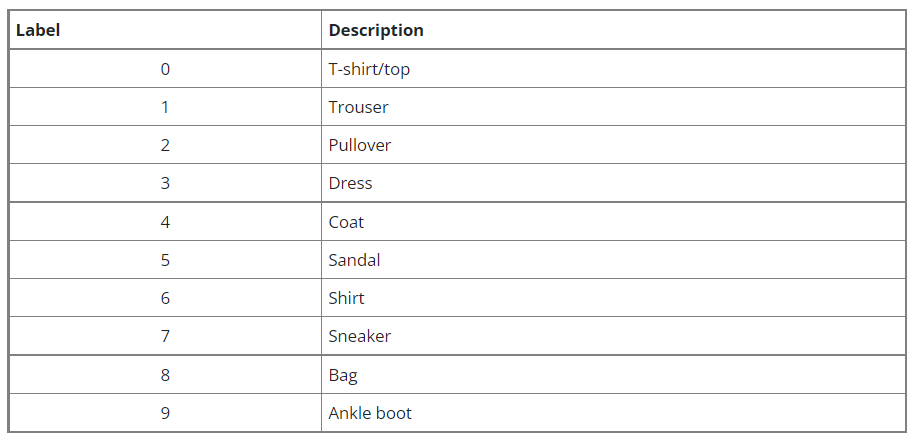

In [35]:
# Importing libraries
import tensorflow
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape', x_train.shape, '\n', 'y_train shape', y_train.shape)

x_train shape (60000, 28, 28) 
 y_train shape (60000,)


5


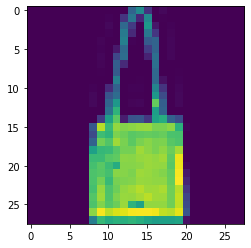

In [37]:
# lets look at an image
print(y_train[13])
plt.imshow(x_train[200])

In [38]:
num_classes = 10

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)


In [39]:
# scale the data
x_train = x_train /255
x_test = x_test/255

## Deep Learning

The goal of this analysis is to build three deep learning models and compare how well these models perform at identifying images. The metrics used to compare model performance were loss and validation accuracy. 

The loss metric will quantify how well each model’s loss function was reduced. Subsequently, the validation accuracy metric will quantify well each model performed at accurately classifying images in the testing dataset.


### Model 1
The first deep learning model is as follows:

conv -> maxpool -> flatten -> dense -> final classification

This model consists of:
* 1 convolution layer
* 1 max pooling layer
* 1 dense layer and
* The final classification layer

This model also has the following hyperparameters:
* The convolution depth will be set to 8
* The kernel will be (3,3)
* the stride will be (2,2)
* Max pooling is (2,2)
* Dense layer 1 has 512 nodes



In [40]:
x_train.shape[1:]

(28, 28)

In [46]:
model_1 = Sequential()

model_1.add(Conv2D(8, (3,3), strides = (2,2), padding = 'same',
                 input_shape=(28,28,1)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 14, 14, 8)         80        
                                                                 
 activation_30 (Activation)  (None, 14, 14, 8)         0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 7, 7, 8)           0         
                                                                 
 flatten_9 (Flatten)         (None, 392)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               201216    
                                                     

In [42]:
batch_size =32 
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

model_1.compile(loss = 'categorical_crossentropy',
               optimizer = opt,
               metrics = ['accuracy'])

hist_1 = model_1.fit(x_train, y_train,
           batch_size = batch_size,
           epochs = 10,
           validation_data= (x_test, y_test),
           shuffle = True)



Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6236 - accuracy: 0.7752 - val_loss: 0.4697 - val_accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4689 - accuracy: 0.8313 - val_loss: 0.4116 - val_accuracy: 0.8515
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4273 - accuracy: 0.8454 - val_loss: 0.3937 - val_accuracy: 0.8591
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4020 - accuracy: 0.8556 - val_loss: 0.3701 - val_accuracy: 0.8690
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3875 - accuracy: 0.8608 - val_loss: 0.3560 - val_accuracy: 0.8722
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3722 - accuracy: 0.8656 - val_loss: 0.3464 - val_accuracy: 0.8771
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3634 - accuracy: 0.8711 - val_loss: 0.3379 -

### Model 2
The second model is as follows:

conv -> conv -> maxpool -> flatten -> dense -> final classification

This model is comprised of:

* 2 convolution layers
* 1 max pooling layer
* 1 dense layer
* The final classification layer

This model also has the following hyperparameters:

* The first convolution depth will be set to 8
* the second convolution depth is 16
* The kernel will be (3,3)
* the stride will be (2,2)
* Max pooling is (2,2)
* Dense layer 1 has 512 nodes


In [49]:
model_2 = Sequential()

model_2.add(Conv2D(8, (3,3), strides = (2,2), padding = 'same',
                 input_shape=(28,28,1)))
model_2.add(Activation('relu'))

model_2.add(Conv2D(16, (3,3), strides = (2,2), padding = 'same'))
model_2.add(Activation('relu'))

model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 14, 14, 8)         80        
                                                                 
 activation_33 (Activation)  (None, 14, 14, 8)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 16)          1168      
                                                                 
 activation_34 (Activation)  (None, 7, 7, 16)          0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 3, 3, 16)          0         
                                                     

In [48]:
model_2.compile(loss = 'categorical_crossentropy',
               optimizer = opt,
               metrics = ['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
           batch_size = batch_size,
           epochs = 10,
           validation_data= (x_test, y_test),
           shuffle = True)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7662 - accuracy: 0.7225 - val_loss: 0.5344 - val_accuracy: 0.8095
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5423 - accuracy: 0.8048 - val_loss: 0.4618 - val_accuracy: 0.8341
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4860 - accuracy: 0.8244 - val_loss: 0.4202 - val_accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4520 - accuracy: 0.8337 - val_loss: 0.4090 - val_accuracy: 0.8527
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4323 - accuracy: 0.8424 - val_loss: 0.3960 - val_accuracy: 0.8559
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4190 - accuracy: 0.8477 - val_loss: 0.3816 - val_accuracy: 0.8648
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4102 - accuracy: 0.8524 - val_loss: 0.3777 - val_ac

### Model 3
The third model is as follows

conv ->  maxpool -> flatten -> dense -> dense -> dense -> final classification

This model consists of:
* 1 convolution layer
* 1 max pooling layer
* 3 dense layer and
* The final classification layer

This model uses the following hyperparameters:

* The convolution depth will be set to 8
* The kernel will be 3 x 3 
* the stride will be (2,2)
* Max pooling is (2,2)
* Dense layer 1 has 512 nodes
* Dense layer 2 has 256 nodes
* Dense layer 3 has 128 nodes


In [54]:
model_3 = Sequential()

model_3.add(Conv2D(8, (3,3), strides = (2,2), padding = 'same',
                 input_shape=(28,28,1)))
model_3.add(Activation('relu'))

#model_3.add(Conv2D(16, (3,3), strides = (2,2), padding = 'same'))
#model_3.add(Activation('relu'))

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())

model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.25))

model_3.add(Dense(256))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.25))

model_3.add(Dense(128))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.25))

model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 14, 14, 8)         80        
                                                                 
 activation_52 (Activation)  (None, 14, 14, 8)         0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 7, 7, 8)           0         
                                                                 
 flatten_13 (Flatten)        (None, 392)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               201216    
                                                     

In [55]:
model_3.compile(loss = 'categorical_crossentropy',
               optimizer = opt,
               metrics = ['accuracy'])

hist_3 = model_3.fit(x_train, y_train,
           batch_size = batch_size,
           epochs = 10,
           validation_data= (x_test, y_test),
           shuffle = True)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6940 - accuracy: 0.7410 - val_loss: 0.4611 - val_accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4901 - accuracy: 0.8251 - val_loss: 0.4083 - val_accuracy: 0.8520
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4496 - accuracy: 0.8402 - val_loss: 0.3886 - val_accuracy: 0.8609
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4364 - accuracy: 0.8462 - val_loss: 0.3961 - val_accuracy: 0.8601
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4307 - accuracy: 0.8526 - val_loss: 0.3742 - val_accuracy: 0.8703
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4234 - accuracy: 0.8548 - val_loss: 0.3668 - val_accuracy: 0.8711
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4206 - accuracy: 0.8570 - val_loss: 0.3705 -

In [68]:
hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Val Accuracy over iteration')

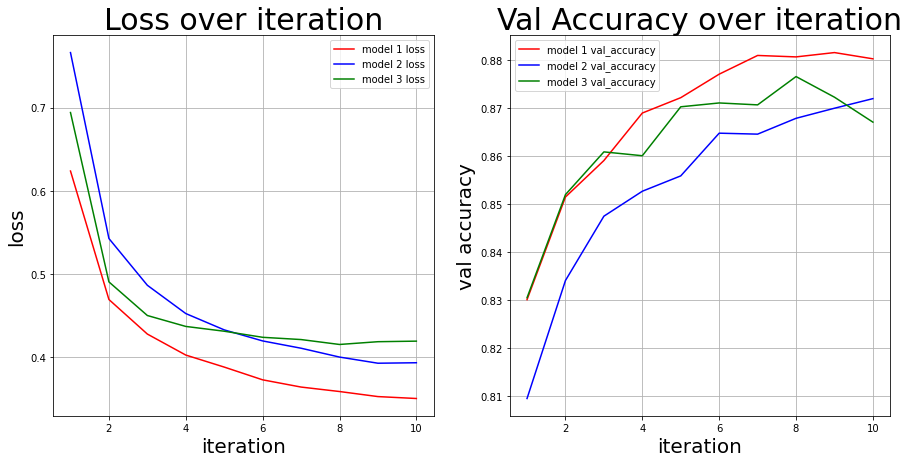

In [88]:
n = len(hist_3.history['loss']) 

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(range(1,n+1), (hist_1.history['loss']), 'r', label='model 1 loss')
ax.plot(range(1,n+1), (hist_2.history['loss']), 'b', label='model 2 loss')
ax.plot(range(1,n+1), (hist_3.history['loss']), 'g', label='model 3 loss')
ax.legend()
ax.grid()
ax.set_xlabel('iteration', fontsize = 20)
ax.set_ylabel('loss', fontsize = 20)
ax.set_title('Loss over iteration', fontsize = 30)

ax = fig.add_subplot(1,2,2)
ax.plot(range(1,n+1), (hist_1.history['val_accuracy']), 'r', label='model 1 val_accuracy')
ax.plot(range(1, n+1), (hist_2.history['val_accuracy']), 'b', label='model 2 val_accuracy')
ax.plot(range(1, n+1), (hist_3.history['val_accuracy']), 'g', label='model 3 val_accuracy')
ax.legend()
ax.grid()
ax.set_xlabel('iteration', fontsize = 20)
ax.set_ylabel('val accuracy', fontsize = 20)
ax.set_title('Val Accuracy over iteration', fontsize = 30)

## Discussion

Model 1 performed the best as it showed the lowest loss and the highest validation accuracy. For this model, 206,426 parameters had to be learnt; most of which came from the dense layer. Furthermore, this model passed 392 inputs into the dense layer; learning a of information in the process.

Model 2 performed worse than model 1. Model 2 had two convolution layers before the dense layer; passing 144 inputs into the dense layer. The additional convolution layer reduced the amount of information that the model could learn from due to its additional 2 x 2 stride. With less information, the model was easier to train but performed worse than model 1.

Model 3 performed the worst as it achieved the highest loss and the lowest validation accuracy. Model 3 was the deepest network as the second convolution layer was removed, however, two additional dense networks were added. Although this model had the most parameters to learn, 366,810, its loss was the highest. This is likely due to vanishing gradients during back propagation as the figure shows that the loss starts to plateau after 5 iterations. The vanishing gradients issue also likely affected the accuracy of this model as the accuracy starts to plateau after 5 iterations. This model would have benefitted from some information transfer in which information gained earlier would be stored and used to train the last 2 dense layers.


# Conclusion

Model 1 was most suited for this analysis as it performed the best. This model was complex enough to achieve high validation accuracy and did not suffer from the vanishing gradient issue. Although this model achieves good performance, it could be further improved by training over more epochs as this will allow the model to run through training set more often; learning more information.

Reducing the stride from (2, 2) to (1, 1), lowering the kernel from (3, 3) to (2, 2) and removing the max pooling will also improve the model's performance. These adjustments will produce more parameters for the model to learn but care must be taken to mitigate the risk of overfitting. 

In the future, model 3 could be rebuilt with transfer learning. The information learned from the first layers could be stored and used to train the last two dense layers. The introduction of transfer learning will mitigate the vanishing gradient issue and possibly lead to a better performing model.



# Thank you for reading this notebook